# Final Project

**Due date: 06-December-2024**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [5]:
library('tidyverse')

In [85]:
NFL_data = read.csv('yearly_team_data.csv')

NFL_data |> glimpse()

Rows: 384
Columns: 51
$ team                <chr> "ARI", "ARI", "ARI", "ARI", "ARI", "ARI", "ARI", "…
$ season              <int> 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 20…
$ total_snaps         <int> 1013, 1020, 983, 1005, 1080, 1046, 896, 988, 1068,…
$ yards_gained        <int> 7595, 9855, 9128, 11337, 10302, 9021, 6761, 9287, …
$ touchdown           <int> 28, 37, 28, 53, 51, 31, 28, 43, 52, 52, 34, 38, 45…
$ extra_point_attempt <int> 25, 37, 27, 53, 43, 23, 23, 34, 45, 47, 24, 22, 44…
$ field_goal_attempt  <int> 25, 30, 29, 28, 21, 32, 12, 31, 23, 31, 28, 28, 33…
$ total_points        <int> 268, 349, 282, 455, 412, 305, 227, 385, 426, 452, …
$ td_points           <int> 168, 222, 168, 318, 306, 186, 168, 258, 312, 312, …
$ xp_points           <int> 25, 37, 27, 53, 43, 23, 23, 34, 45, 47, 24, 22, 44…
$ fg_points           <int> 75, 90, 87, 84, 63, 96, 36, 93, 69, 93, 84, 84, 99…
$ fumble              <int> 16, 17, 13, 16, 25, 19, 22, 9, 20, 26, 24, 19, 9, …
$ fumble_lost     

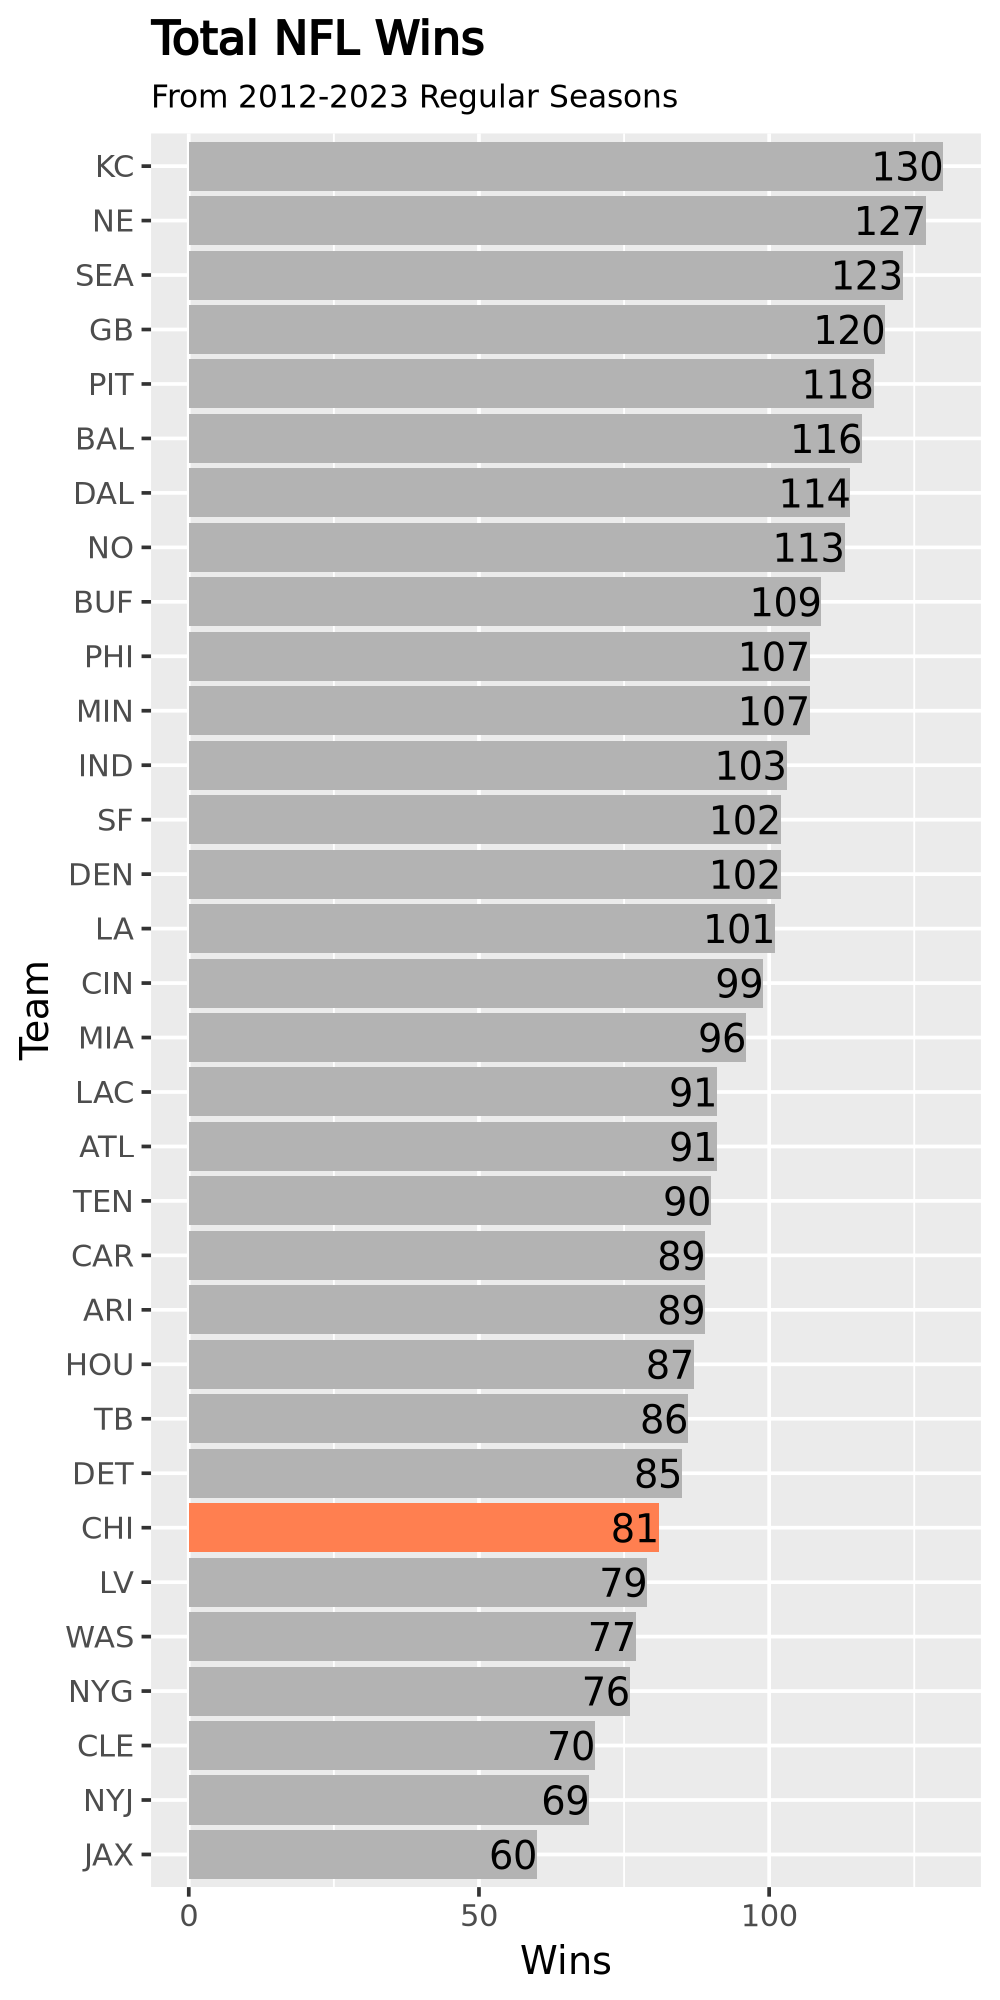

In [112]:
options(repr.plot.height = 8)

NFL_data |>
    group_by(team) |>
    summarize(Total_wins = sum(wins, na.rm = T)) |>
    mutate(team = fct_reorder(team, Total_wins), 
          is_CHI = team == 'CHI') |>

ggplot(aes(x = Total_wins, y = team, fill = is_CHI)) + 
    geom_col() + 
    scale_fill_manual(values = c('grey70', 'coral')) + 
    labs(title = 'Total NFL Wins', subtitle = 'From 2012-2023 Regular Seasons', x = 'Wins', y = 'Team') + 
    guides(fill = 'none') + 
    geom_text(aes(label = Total_wins), hjust = 1) + 
    theme(
        plot.title = element_text(face = 'bold'),    
        plot.subtitle = element_text(family = 'Comic Sans', size = 9) 
         )

In [120]:
NFL_data |>
    summarize(
        mean(rushing_yards),
        mean(passing_yards)      
    )
    

mean(rushing_yards),mean(passing_yards)
<dbl>,<dbl>
1859.201,4032.023


In [142]:
NFL_data |> 
  mutate(Division = fct_collapse(team, 
                                       'AFC East' = c('BUF', 'MIA', 'NYJ', 'NE'), 
                                       'AFC North' = c('PIT', 'BAL', 'CIN', 'CLE'),
                                       'AFC South' = c('HOU', 'IND', 'TEN', 'JAX'),
                                       'AFC West' = c('KC', 'LAC', 'DEN', 'LV'),
                                       'NFC East' = c('PHI', 'WAS', 'DAL', 'NYG'),
                                       'NFC North' = c('DET', 'CHI', 'MIN', 'GB'),
                                       'NFC South' = c('ATL', 'TB', 'NO', 'CAR'), 
                                       'NFC West' = c('SEA', 'ARI', 'LA', 'SF')                                      
                                      ))|>  
    mutate(Division = fct_drop(Division)) |>  
    group_by(Division) |>
    summarize(avg_wins = mean(wins),
              avg_passing_yards = mean(passing_yards),
              avg_rushing_yards = mean(rushing_yards)) |>
    arrange(desc(avg_wins))

Division,avg_wins,avg_passing_yards,avg_rushing_yards
<fct>,<dbl>,<dbl>,<dbl>
NFC West,8.645833,3930.500,1950.562
AFC North,8.395833,3968.292,1877.792
AFC West,8.375000,4223.208,1770.729
AFC East,8.354167,3865.604,1879.333
NFC North,8.187500,4059.250,1855.729
NFC South,7.895833,4275.042,1787.542
NFC East,7.791667,4050.917,1917.042
AFC South,7.083333,3883.375,1834.875


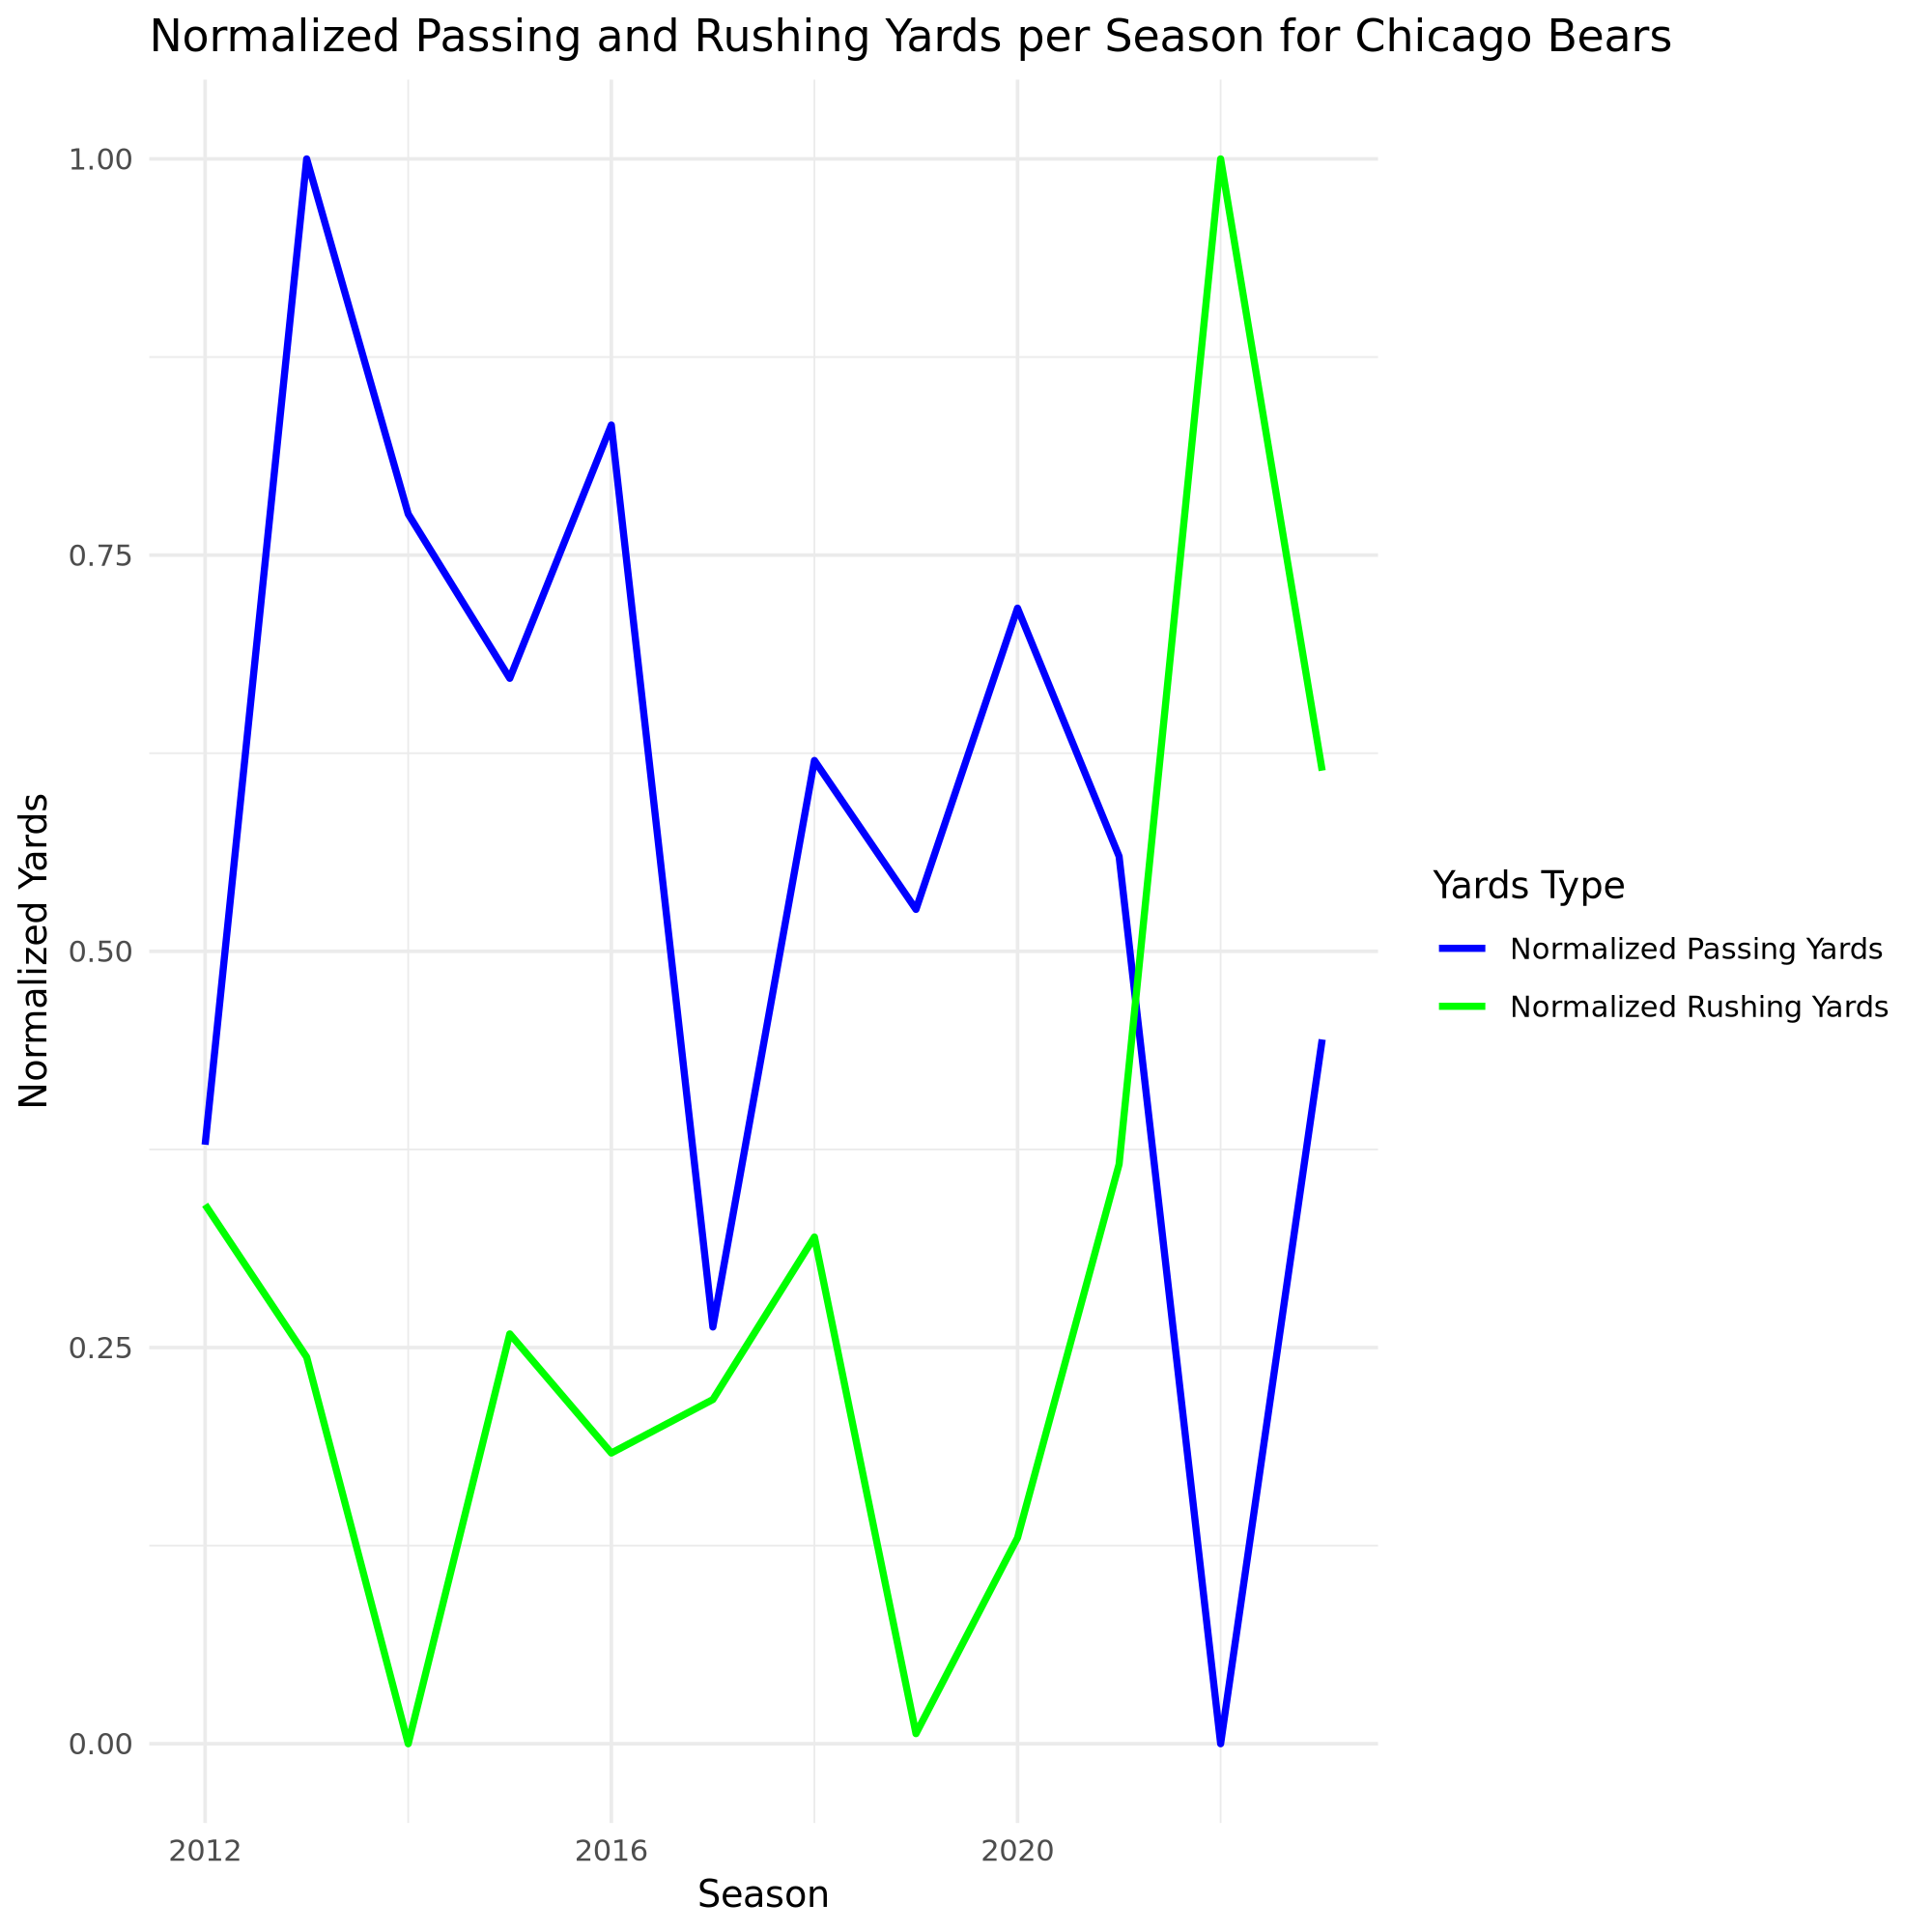

In [149]:
options(repr.plot.width = 8)

NFL_data |> 
  filter(team == 'CHI') |> 
  mutate(
    normalized_passing_yards = (passing_yards - min(passing_yards)) / (max(passing_yards) - min(passing_yards)),
    normalized_rushing_yards = (rushing_yards - min(rushing_yards)) / (max(rushing_yards) - min(rushing_yards))
  ) |> 
  ggplot(aes(x = season)) + 
  geom_line(aes(y = normalized_passing_yards, color = "Normalized Passing Yards"), size = 1) + 
  geom_line(aes(y = normalized_rushing_yards, color = "Normalized Rushing Yards"), size = 1) + 
  labs(title = "Normalized Passing and Rushing Yards per Season for Chicago Bears",
       x = "Season",
       y = "Normalized Yards",
       color = "Yards Type") + 
  theme_minimal() +
  scale_color_manual(values = c("Normalized Passing Yards" = "blue", "Normalized Rushing Yards" = "green"))

# Analysis


I first began by analyzing the aggregate wins of NFL teams in the regular season from 2012-2023, observed in the bar graph. I made sure to order the graph by wins using the forcats functions to make it more visually appealing. Then, I highlighted the Bears as a Chicago fan to easily identify where they are among the ranks. After this, I wanted to observe the competition between divisions. This was difficult as the dataset I retrieved did not categorize the divisions for the teams so I had to collapse the teams into their respective divisions. I observed differences in average rushing and passing yards across the 2012-2023 regular season data and ordered the Divisions according to the average number of wins in each division. 

Lastly, as a Chicago Bears fan, I created a line graph to visually observe the differences in passing and rushing yards over the years. Since there is usually a large difference in these measures I had to normalize the data accordingly. Once the data was normalized, I was able to insert it into the ggplot2 code to produce a line graph demonstrating the changes in the rushing and passing yards. It was interesting to observe the dramatic change to an increase in rushing yards and a decrease in passing in the 2021 season. This makes sense as Justin Fields was drafted this year and the Chicago Bears demonstrated difficulties with their passing offense, but Justin went on to be an incredible rushing quarterback.  